<a href="https://colab.research.google.com/github/flyingrockingit/Module-11/blob/main/Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary class classification**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
dataset=load_breast_cancer()
print (f"Target variables:{dataset.target_names}")
(unique,counts) = np.unique(dataset.target,return_counts=True)
print (f"Unique values of the target variables:{unique}")
print (f"count of the target:{counts}")

Target variables:['malignant' 'benign']
Unique values of the target variables:[0 1]
count of the target:[212 357]


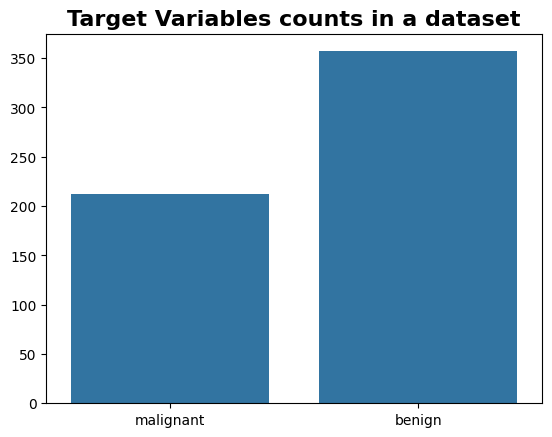

In [5]:
sns.barplot(x=dataset['target_names' ],y=counts)
plt.title("Target Variables counts in a dataset", fontsize=16, fontweight='bold')
plt. show()

# **Multi-class Classification:**

In [6]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

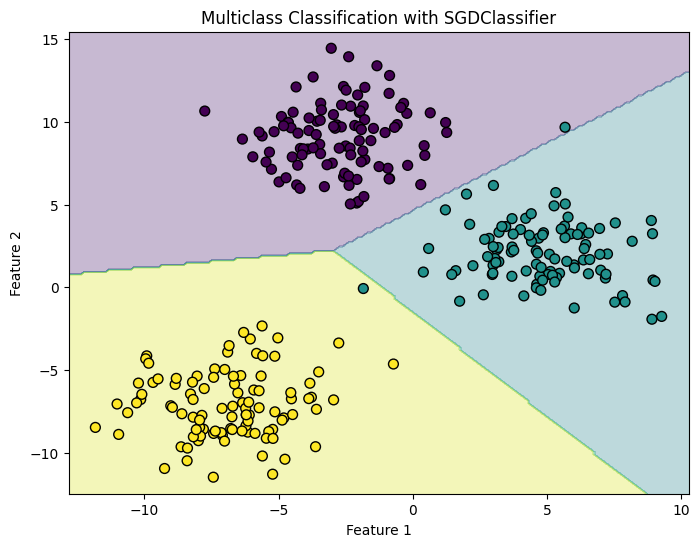

In [8]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2.0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

clf = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50)
plt.title("Multiclass Classification with SGDClassifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()